In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
columns = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"]

In [3]:
df = pd.read_csv("cleveland-0_vs_4.dat",sep=",",skiprows=list(np.arange(18)),names=columns)

In [19]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
2,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
3,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
4,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [6]:
df.num.value_counts()

negative    164
positive     13
Name: num, dtype: int64

In [7]:
df["num"] = df["num"].replace({"negative":0,"positive":1})

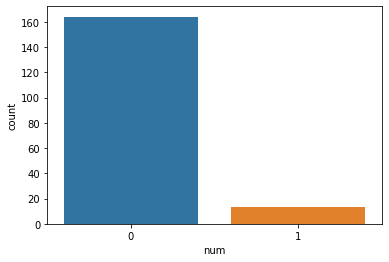

kalp krizi geciren insan oranı: 7.34
sağlıklı insan oranı: 92.66


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df.num)
plt.show()
print("kalp krizi geciren insan oranı: {:.2f}".format(sum(df.num)/len(df.num)*100))
print("sağlıklı insan oranı: {:.2f}".format((len(df.num)-sum(df.num))/len(df.num)*100))

Oranlar sınıf dengesizliği olduğunu gösteriyor.  

In [10]:
df = df.replace({'<null>':np.nan})

In [11]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          3
thal        1
num         0
dtype: int64

In [12]:
df["ca"] = df["ca"].fillna(0)
df["thal"] = df["thal"].fillna(3)

In [13]:
def model_olustur(X,y):
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=111,stratify=y)
    log_reg = LogisticRegression()
    log_reg.fit(X_train,y_train)
    
    predict_train = log_reg.predict(X_train)
    predict_test = log_reg.predict(X_test)
    
    train_confusion_matrix = confusion_matrix(y_train,predict_train)
    test_confusion_matrix = confusion_matrix(y_test,predict_test)
    
    print("model doğruluğu: ",log_reg.score(X_train,y_train))
    print("eğitim veri kümesi metrik değerleri")
    print(classification_report(y_train,predict_train))
    print("test veri kümesi metrik değerleri")
    print(classification_report(y_test,predict_test))
    
    return None

In [14]:
X = df.drop("num",axis=1)
y = df["num"]
model_olustur(X,y)

model doğruluğu:  0.9787234042553191
eğitim veri kümesi metrik değerleri
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       131
           1       0.89      0.80      0.84        10

    accuracy                           0.98       141
   macro avg       0.94      0.90      0.92       141
weighted avg       0.98      0.98      0.98       141

test veri kümesi metrik değerleri
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.50      0.33      0.40         3

    accuracy                           0.92        36
   macro avg       0.72      0.65      0.68        36
weighted avg       0.90      0.92      0.91        36



model doğruluğu yüksek gibi gözükse de metrikler cok düşük,bu metrikleri iyileştirmek için izleyeceğimiz bi kaç adım var:

#### 1.Örneklem arttırma

In [15]:
from sklearn.utils import resample

saglıklı = df[df.num == 0]
kalpkrizi = df[df.num == 1]

arttırılmıs_kalpkrizi = resample(kalpkrizi,
                                 replace = True,
                                 n_samples = len(saglıklı),
                                 random_state = 111
                                )

arttırılmıs_df = pd.concat([saglıklı,arttırılmıs_kalpkrizi])
arttırılmıs_df.num.value_counts()

0    164
1    164
Name: num, dtype: int64

In [16]:
X = arttırılmıs_df.drop("num",axis=1)
y = arttırılmıs_df["num"]
model_olustur(X,y)

model doğruluğu:  0.9732824427480916
eğitim veri kümesi metrik değerleri
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       131
           1       0.95      1.00      0.97       131

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262

test veri kümesi metrik değerleri
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



Elimizde cok fazla veri yok, o yüzden örneklem azaltma yapmak bizi yanıltabilir.

#### 2.SMOTE

In [17]:
from imblearn.over_sampling import SMOTE

X = df.drop("num",axis=1)
y = df["num"]

sm = SMOTE(random_state=100)
X_smote,y_smote = sm.fit_resample(X,y)

model_olustur(X_smote,y_smote)

model doğruluğu:  0.9770992366412213
eğitim veri kümesi metrik değerleri
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       131
           1       0.96      1.00      0.98       131

    accuracy                           0.98       262
   macro avg       0.98      0.98      0.98       262
weighted avg       0.98      0.98      0.98       262

test veri kümesi metrik değerleri
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



#### 3.ADASYN

In [18]:
from imblearn.over_sampling import ADASYN

ads = ADASYN()

X = df.drop("num",axis=1)
y = df["num"]

X_ads,y_ads = ads.fit_resample(X,y)

model_olustur(X_ads,y_ads)

model doğruluğu:  0.973384030418251
eğitim veri kümesi metrik değerleri
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       131
           1       0.95      1.00      0.97       132

    accuracy                           0.97       263
   macro avg       0.97      0.97      0.97       263
weighted avg       0.97      0.97      0.97       263

test veri kümesi metrik değerleri
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



3 yöntemin de hem model doğruluğu hem de hata metrikleri incelendiğinde bu veri seti için en kullanıslı olan SMOTE yöntemidir.